In [1]:
# Import libraries. You may or may not use all of these.
# !pip install -q git+https://github.com/tensorflow/docs
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

import tensorflow_docs as tfdocs
import tensorflow_docs.plots
import tensorflow_docs.modeling

In [18]:
# Import data
# !wget https://cdn.freecodecamp.org/project-data/health-costs/insurance.csv
dataset = pd.read_csv('insurance.csv')

In [20]:
# adatkeret másolat készítése
dataFrame = dataset.copy()

In [29]:
# szöveges értékek átalakítása
for col_name in dataFrame.columns:
    if (dataFrame[col_name].dtype == 'object'):
        elements_of_column = list(dataFrame[col_name])
        mapping = {value: index for index, value in enumerate(set(elements_of_column))}
        dataFrame[col_name] = dataFrame[col_name].map(mapping)

print('Átalakítás után: ')

dataFrame.tail()

Átalakítás után: 


,age,sex,bmi,children,smoker,region,expenses
1333,50,0,31.0,3,1,3,10600.55
1334,18,1,31.9,0,1,0,2205.98
1335,18,1,36.9,0,1,1,1629.83
1336,21,1,25.8,0,1,2,2007.95
1337,61,1,29.1,0,0,3,29141.36


In [52]:
# meglévő adathalmaz szétbontása 80-20 arányban
train_dataset = dataFrame.sample(frac=0.8)
test_dataset = dataFrame.drop(train_dataset.index)

# adat halmazok adatmennyiségeinek vizsgálata
print(dataFrame.shape, train_dataset.shape, test_dataset.shape)

(1338, 7) (1070, 7) (268, 7)


In [53]:
train_labels = train_dataset.pop('expenses')
test_labels = test_dataset.pop('expenses')

# print(train_labels, test_labels)

29      38711.00
785      6414.18
92      30184.94
415      7345.73
287     14256.19
          ...   
289     25992.82
1073    12096.65
675      7222.79
2        4449.46
213      5002.78
Name: expenses, Length: 1070, dtype: float64 4        3866.86
8        6406.41
9       28923.14
13      11090.72
14      39611.76
          ...   
1317     1163.46
1321    28101.33
1331    10795.94
1332    11411.69
1335     1629.83
Name: expenses, Length: 268, dtype: float64


In [92]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(32, activation='relu'))
model.add(tf.keras.layers.Dropout(0.1))
model.add(tf.keras.layers.Dense(64, activation='relu'))
model.add(tf.keras.layers.Dropout(0.13))
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dropout(0.17))
model.add(tf.keras.layers.Dense(1))

model.compile(optimizer='adam', loss="mean_squared_error", metrics=['mae', 'mse'])
model.fit(train_dataset, train_labels, epochs=400)


Epoch 1/400
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 323574080.0000 - mae: 13313.3516 - mse: 323574080.0000
Epoch 2/400
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 302038816.0000 - mae: 12782.8984 - mse: 302038816.0000 
Epoch 3/400
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 293429248.0000 - mae: 11610.6572 - mse: 293429248.0000 
Epoch 4/400
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 956us/step - loss: 165992304.0000 - mae: 7886.7676 - mse: 165992304.0000
Epoch 5/400
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 878us/step - loss: 136941312.0000 - mae: 9480.8447 - mse: 136941312.0000
Epoch 6/400
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 132344544.0000 - mae: 8756.3457 - mse: 132344544.0000
Epoch 7/400
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 124008912.0000 - mae: 8706.3096 - mse: 124008912.0000 
Epoch 8/400
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 138454992.0000 - mae: 9242.3398 - mse: 138454992.0000 
Epoch 9/400
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 131981496.0000 - mae: 8842

9/9 - 0s - 10ms/step - loss: 21237838.0000 - mae: 2426.8335 - mse: 21237838.0000
Testing set Mean Abs Error: 2426.83 expenses
You passed the challenge. Great job!
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


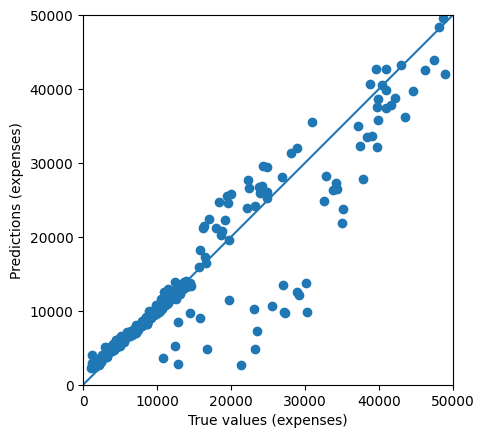

In [93]:
# RUN THIS CELL TO TEST YOUR MODEL. DO NOT MODIFY CONTENTS.
# Test model by checking how well the model generalizes using the test set.
loss, mae, mse = model.evaluate(test_dataset, test_labels, verbose=2)

print("Testing set Mean Abs Error: {:5.2f} expenses".format(mae))

if mae < 3500:
  print("You passed the challenge. Great job!")
else:
  print("The Mean Abs Error must be less than 3500. Keep trying.")

# Plot predictions.
test_predictions = model.predict(test_dataset).flatten()

a = plt.axes(aspect='equal')
plt.scatter(test_labels, test_predictions)
plt.xlabel('True values (expenses)')
plt.ylabel('Predictions (expenses)')
lims = [0, 50000]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims,lims)
